In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
# Step 1: Generate synthetic data
np.random.seed(0)
X = np.linspace(-6, 6, 100)
np.random.seed(0)
X = np.linspace(-6, 6, 100)
y = 5 * X**4 - 1.5 * X**3  + 1.25 * X**2 +0.1 * X
scaler = MinMaxScaler(feature_range=(-1, 1))
y = scaler.fit_transform(y.reshape(-1, 1)).flatten()
y=y+ np.random.normal(0, 1, 100)
# Reshape X to a column vector
X = X[:, np.newaxis]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



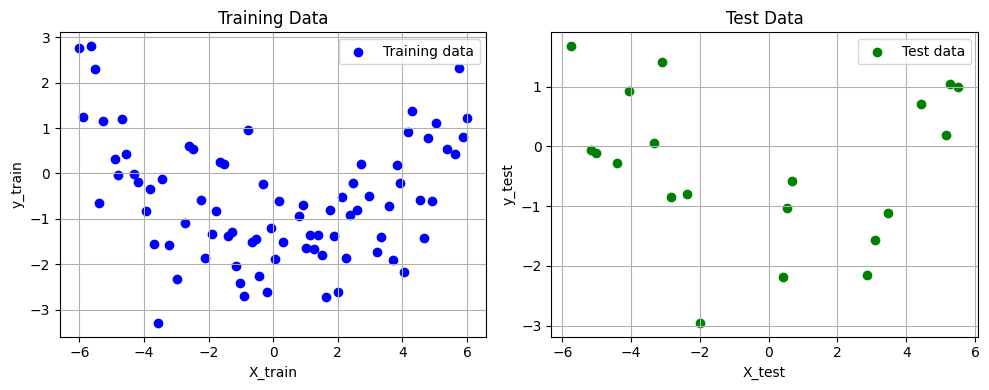

In [2]:
# Plot X_train and y_train
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.title('Training Data')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.grid(True)
plt.legend()

# Plot X_test and y_test
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.title('Test Data')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

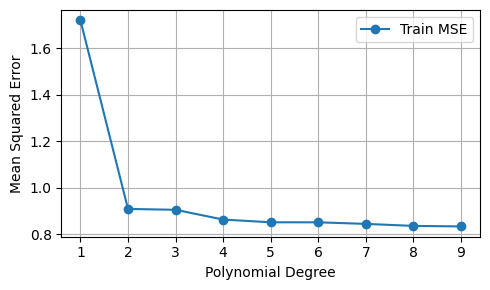

In [3]:
# Step 2 & 3: Fit polynomial regression models and calculate MSE
degrees = np.arange(1, 10)
train_mse = []
test_mse = []

for degree in degrees:
    # Transform the features to polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate MSE
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plot the MSE vs. degree of polynomial
plt.figure(figsize=(5, 3))
plt.plot(degrees, train_mse, label='Train MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


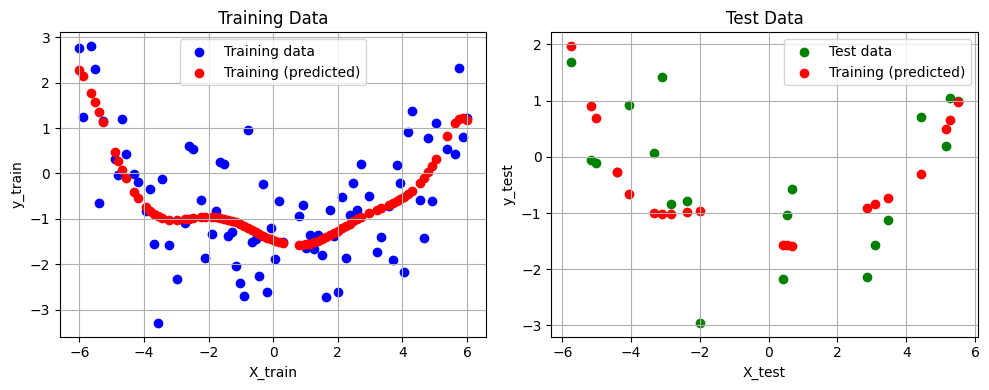

In [4]:
# Plot X_train and y_train
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_train, y_train_pred, color='red', label='Training (predicted)')
plt.title('Training Data')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.grid(True)
plt.legend()

# Plot X_test and y_test
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.scatter(X_test, y_test_pred, color='red', label='Training (predicted)')
plt.title('Test Data')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

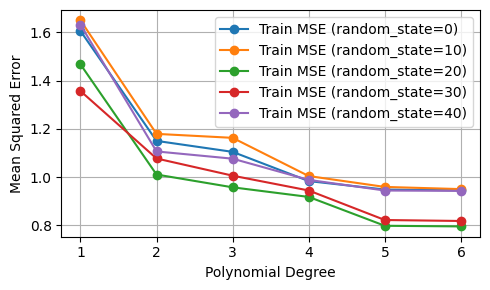

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
# Generate synthetic data
np.random.seed(0)
X = np.linspace(-6, 6, 100)
y = 5 * X**4 - 1.5 * X**3  + 1.25 * X**2 +0.1 * X + np.random.normal(0, 1, 100)
scaler = MinMaxScaler(feature_range=(-1, 1))
y = scaler.fit_transform(y.reshape(-1, 1)).flatten()
y=y+ np.random.normal(0, 1, 100)
# Reshape X to a column vector
X = X[:, np.newaxis]

# Define different random_state values to test
random_states = [0, 10, 20, 30, 40]

# Lists to store MSE values for each random_state
train_mse_list = []
test_mse_list = []

# Loop through each random_state value
for random_state in random_states:
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Lists to store MSE values for each degree of polynomial
    train_mse = []
    test_mse = []

    # Fit polynomial regression models and calculate MSE
    degrees = np.arange(1, 7)
    for degree in degrees:
        # Transform the features to polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Predict on training and test data
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        # Calculate MSE
        train_mse.append(mean_squared_error(y_train, y_train_pred))
        test_mse.append(mean_squared_error(y_test, y_test_pred))

    # Append MSE values to the lists
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

# Plot MSE vs. polynomial degree for each random_state value
plt.figure(figsize=(5, 3))
for i, random_state in enumerate(random_states):
    plt.plot(degrees, train_mse_list[i], label=f'Train MSE (random_state={random_state})', marker='o')

    #plt.plot(degrees, test_mse_list[i], label=f'Test MSE (random_state={random_state})', marker='o')


plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
